In [4]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

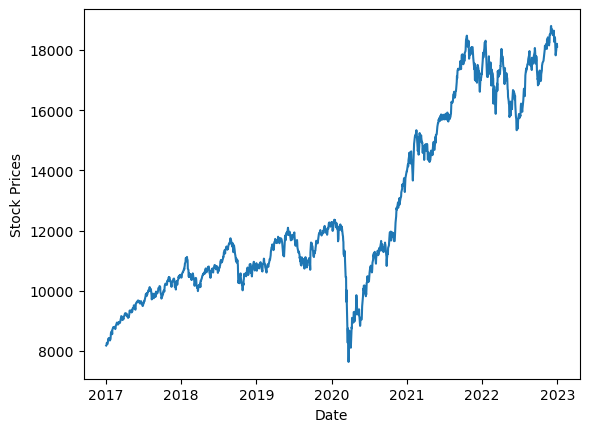

In [5]:
#get data
df = pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv', parse_dates = ['minute'], index_col = ['minute']).close
df.head()
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.plot(df)

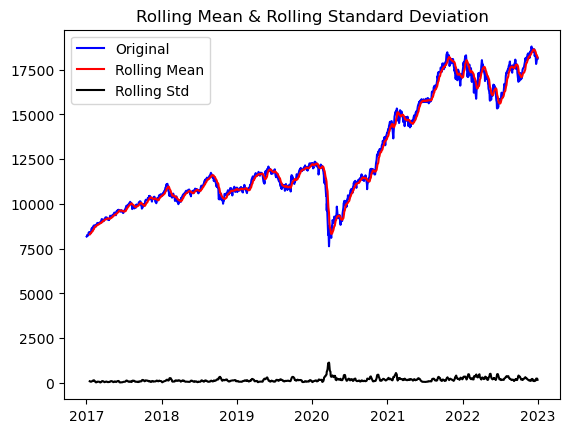

In [7]:
#go through the rolling mean
#plot the rolling mean and rolling standard deviation
#the stock data is stationary if they remain constant with time
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()
#not stationary, as seen from the plot

In [9]:
#the stock price is considered stationary if the p-value is low
result = adfuller(df)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
#the ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05)
#the stock price is not stationary.

ADF Statistic: -0.6402202388649051
p-value: 0.8616325052216424
Critical Values:
	1%: -3.434803261722705
	5%: -2.863506823125904
	10%: -2.567817117325164


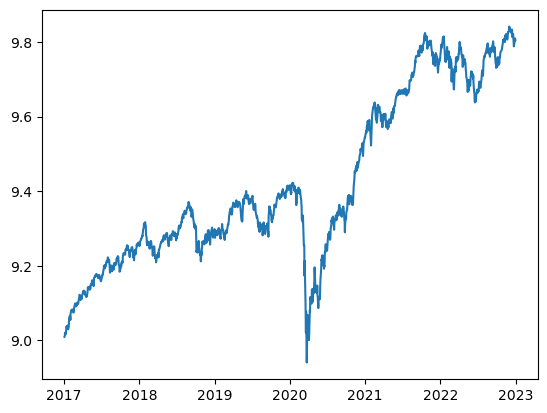

In [10]:
#log of the dependent variable lowering the rate at which rolling mean increases
df_log = np.log(df)
plt.plot(df_log)

In [14]:
#function definition
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

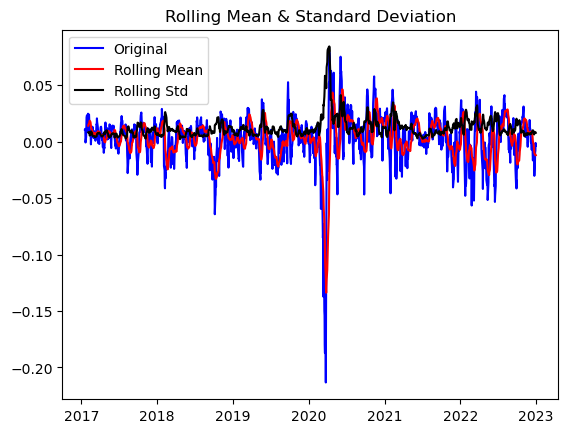

ADF Statistic: -8.270655505647238
p-value: 4.803396053114744e-13
Critical Values:
	1%: -3.4348554210983093
	5%: -2.8635298424390276
	10%: -2.5678293754552732


In [15]:
#log of dependent variable to stationary series,good way
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

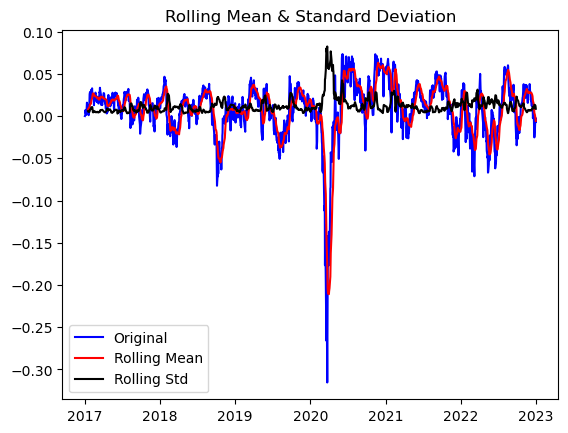

ADF Statistic: -5.800280837430309
p-value: 4.648315181035934e-07
Critical Values:
	1%: -3.4348184769200056
	5%: -2.86351353803652
	10%: -2.567820693109295


In [16]:
#exponential decay to stationary series, better way
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

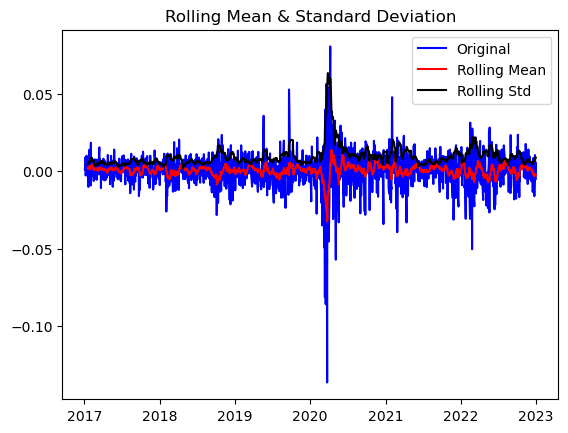

ADF Statistic: -10.96720107945906
p-value: 8.047541606343943e-20
Critical Values:
	1%: -3.4348184769200056
	5%: -2.86351353803652
	10%: -2.567820693109295


In [17]:
#time shifting, we subtract every the point by the one that preceded it, best way
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)